# Pandas Documentation on Group By

In this notebook, you will work through the Pandas documentation on "group by".

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Pandas group by: split-apply-combine

In this notebook, you are going to learn how to use Pandas by typing the code from the Pandas documentation into this notebook.

* Go to the Pandas Documentation for [Group By](http://pandas.pydata.org/pandas-docs/stable/groupby.html#group-by-split-apply-combine).
* Type all of the code from that section of the documentation into this notebook and get it working.
* **To learn this API well, you must type the code rather than copy and pasting it**.
* Create a new cell in this section for each `In[]` prompt in the documentation.
* Ignore the cells in the **Grading** section below.
* No Markdown comments are needed.
* Skip the following sub-sections:
  - Grouping with a Grouper specification
  - Plotting
  - Examples

## Grading

YOUR ANSWER HERE

In [2]:
df = pd.DataFrame({'A' : ['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B' : ['one','one','two','three','two','two','one','three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)
        
    })

In [3]:
df

A      B         C         D
0  foo    one  1.370901  0.701782
1  bar    one  0.806023  0.138760
2  foo    two  0.442305 -0.053322
3  bar  three  1.027602 -1.045599
4  foo    two  1.042652 -0.595491
5  bar    two  1.482345 -0.706071
6  foo    one  1.367539 -2.514297
7  foo  three -1.880647  0.164252

In [4]:
grouped=df.groupby('A')

In [5]:
grouped=df.groupby(['A','B'])

In [6]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [7]:
grouped = df.groupby(get_letter_type,axis=1)

In [8]:
lst=[1,2,3,1,2,3]

In [9]:
s = pd.Series([1,2,3,10,20,30],lst)

In [10]:
grouped=s.groupby(level=0)

In [11]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [12]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [13]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

In [14]:
df2=pd.DataFrame({'X':['B','B','A','A'], 'Y':[1,2,3,4]})

In [15]:
df2.groupby(['X']).sum()

Y
X   
A  7
B  3

In [16]:
df2.groupby(['X'], sort=False).sum()

Y
X   
B  3
A  7

In [17]:
df3 = pd.DataFrame({'X':['A','B','A','B'],'Y':[1,4,3,2]})

In [18]:
df3.groupby(['X']).get_group('A')

X  Y
0  A  1
2  A  3

In [19]:
df3.groupby(['X']).get_group('B')

X  Y
1  B  4
3  B  2

In [20]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [21]:
df.groupby(get_letter_type,axis=1).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [22]:
grouped = df.groupby(['A','B'])

In [23]:
grouped.groups

{('bar', 'one'): [1],
 ('bar', 'three'): [3],
 ('bar', 'two'): [5],
 ('foo', 'one'): [0, 6],
 ('foo', 'three'): [7],
 ('foo', 'two'): [2, 4]}

In [24]:
len(grouped)

6

In [25]:
n=10

In [26]:
weight=np.random.normal(166,20,size=n)

In [27]:
height=np.random.normal(60,10,size=n)

In [28]:
time=pd.date_range('1/1/2000',periods=n)

In [29]:
gender=np.random.choice(['male','female'],size=n)

In [30]:
df=pd.DataFrame({'height':height,'weight':weight,
                 'gender': gender},index=time)

In [31]:
df

gender     height      weight
2000-01-01  female  50.986642  195.719466
2000-01-02    male  61.296691  150.896565
2000-01-03  female  67.848805  156.807137
2000-01-04    male  68.889096  182.734550
2000-01-05  female  64.365403  157.242272
2000-01-06  female  69.459900  143.088306
2000-01-07    male  61.554209  186.420465
2000-01-08    male  51.344919  159.515116
2000-01-09    male  65.873547  146.549800
2000-01-10    male  60.607017  180.901021

In [32]:
gb=df.groupby('gender')

In [33]:
df=pd.DataFrame({'A':['foo','bar','foo','bar',
                      'foo','bar','foo','foo'],
                 'B':['one','one','two','three',
                      'two','two','one','three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})

In [34]:
arrays=[['bar','bar','baz','baz','foo','foo','qux','qux'],
       ['one','two','one','two','one','two','one','two']]

In [35]:
index=pd.MultiIndex.from_arrays(arrays,names=['first','second'])

In [36]:
s=pd.Series(np.random.randn(8),index=index)

In [37]:
s

first  second
bar    one       1.468155
       two      -1.515522
baz    one      -0.328637
       two       1.863983
foo    one      -0.164115
       two       0.189107
qux    one       0.213284
       two       0.775689
dtype: float64

In [38]:
grouped=s.groupby(level=0)

In [39]:
grouped.sum()

first
bar   -0.047367
baz    1.535345
foo    0.024991
qux    0.988973
dtype: float64

In [40]:
s.groupby(level='second').sum()

second
one    1.188686
two    1.313256
dtype: float64

In [41]:
s.sum(level='second')

second
one    1.188686
two    1.313256
dtype: float64

In [42]:
arrays=[['bar','bar','baz','baz','foo','foo','qux','qux'],
        ['doo','doo','bee','bee','bop','bop','bop','bop'],
        ['one','two','one','two','one','two','one','two']]

In [43]:
tuples=list(zip(*arrays))

In [44]:
index=pd.MultiIndex.from_tuples(tuples,names=['first','second','third'])

In [45]:
s=pd.Series(np.random.randn(8),index=index)

In [46]:
s

first  second  third
bar    doo     one     -0.031146
               two      0.390094
baz    bee     one     -1.523746
               two     -0.028065
foo    bop     one      0.633568
               two     -0.423177
qux    bop     one      1.450989
               two      0.573166
dtype: float64

In [47]:
s.groupby(level=['first','second']).sum()

first  second
bar    doo       0.358948
baz    bee      -1.551812
foo    bop       0.210390
qux    bop       2.024155
dtype: float64

In [48]:
grouped=df.groupby(['A'])

In [49]:
grouped_C=grouped['C']

In [50]:
grouped_D=grouped['D']

In [51]:
df['C'].groupby(df['A'])

In [52]:
grouped=df.groupby('A')

In [53]:
for name,group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.065341  1.085789
3  bar  three -1.027328 -0.351481
5  bar    two  0.231045  0.275189
foo
     A      B         C         D
0  foo    one  0.556497  1.973154
2  foo    two  0.762798 -0.320861
4  foo    two  0.609922  0.559290
6  foo    one  0.687213 -0.726632
7  foo  three  0.845492  0.525181


In [54]:
for name,group in df.groupby(['A','B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -0.065341  1.085789
('bar', 'three')
     A      B         C         D
3  bar  three -1.027328 -0.351481
('bar', 'two')
     A    B         C         D
5  bar  two  0.231045  0.275189
('foo', 'one')
     A    B         C         D
0  foo  one  0.556497  1.973154
6  foo  one  0.687213 -0.726632
('foo', 'three')
     A      B         C         D
7  foo  three  0.845492  0.525181
('foo', 'two')
     A    B         C         D
2  foo  two  0.762798 -0.320861
4  foo  two  0.609922  0.559290


In [55]:
grouped.get_group('bar')

A      B         C         D
1  bar    one -0.065341  1.085789
3  bar  three -1.027328 -0.351481
5  bar    two  0.231045  0.275189

In [56]:
df.groupby(['A','B']).get_group(('bar','one'))

A    B         C         D
1  bar  one -0.065341  1.085789

In [57]:
grouped=df.groupby('A')

In [58]:
grouped.aggregate(np.sum)

C         D
A                      
bar -0.861624  1.009497
foo  3.461922  2.010132

In [59]:
grouped=df.groupby(['A','B'])

In [60]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.065341  1.085789
    three -1.027328 -0.351481
    two    0.231045  0.275189
foo one    1.243710  1.246522
    three  0.845492  0.525181
    two    1.372720  0.238429

In [61]:
grouped=df.groupby(['A','B'],as_index=False)

In [62]:
grouped.aggregate(np.sum)

A      B         C         D
0  bar    one -0.065341  1.085789
1  bar  three -1.027328 -0.351481
2  bar    two  0.231045  0.275189
3  foo    one  1.243710  1.246522
4  foo  three  0.845492  0.525181
5  foo    two  1.372720  0.238429

In [63]:
df.groupby('A',as_index=False).sum()

A         C         D
0  bar -0.861624  1.009497
1  foo  3.461922  2.010132

In [64]:
df.groupby(['A','B']).sum().reset_index()

A      B         C         D
0  bar    one -0.065341  1.085789
1  bar  three -1.027328 -0.351481
2  bar    two  0.231045  0.275189
3  foo    one  1.243710  1.246522
4  foo  three  0.845492  0.525181
5  foo    two  1.372720  0.238429

In [65]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [66]:
grouped.describe()

C         D
0 count  1.000000  1.000000
  mean  -0.065341  1.085789
  std         NaN       NaN
  min   -0.065341  1.085789
  25%   -0.065341  1.085789
  50%   -0.065341  1.085789
  75%   -0.065341  1.085789
  max   -0.065341  1.085789
1 count  1.000000  1.000000
  mean  -1.027328 -0.351481
  std         NaN       NaN
  min   -1.027328 -0.351481
  25%   -1.027328 -0.351481
  50%   -1.027328 -0.351481
  75%   -1.027328 -0.351481
  max   -1.027328 -0.351481
2 count  1.000000  1.000000
  mean   0.231045  0.275189
  std         NaN       NaN
  min    0.231045  0.275189
  25%    0.231045  0.275189
  50%    0.231045  0.275189
  75%    0.231045  0.275189
  max    0.231045  0.275189
3 count  2.000000  2.000000
  mean   0.621855  0.623261
  std    0.092430  1.909037
  min    0.556497 -0.726632
  25%    0.589176 -0.051685
  50%    0.621855  0.623261
  75%    0.654534  1.298208
  max    0.687213  1.973154
4 count  1.000000  1.000000
  mean   0.845492  0.525181
  std         NaN       NaN
  min    0.845492  0.525181
  25%    0.845492  0.525181
  50%    0.845492  0.525181
  75%    0.845492  0.525181
  max    0.845492  0.525181
5 count  2.000000  2.000000
  mean   0.686360  0.119215
  std    0.108099  0.622360
  min    0.609922 -0.320861
  25%    0.648141 -0.100823
  50%    0.686360  0.119215
  75%    0.724579  0.339252
  max    0.762798  0.559290

In [67]:
grouped=df.groupby('A')

In [68]:
grouped['C'].agg([np.sum,np.mean,np.std])

sum      mean       std
A                                
bar -0.861624 -0.287208  0.657871
foo  3.461922  0.692384  0.115858

In [69]:
grouped['D'].agg({'result':np.sum,
                  'result2':np.mean})

result2    result
A                      
bar  0.336499  1.009497
foo  0.402026  2.010132

In [70]:
grouped.agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.861624 -0.287208  0.657871  1.009497  0.336499  0.720594
foo  3.461922  0.692384  0.115858  2.010132  0.402026  1.037398

In [71]:
grouped.agg({'C':np.sum,
            'D':lambda x: np.std(x,ddof=1)})

C         D
A                      
bar -0.861624  0.720594
foo  3.461922  1.037398

In [72]:
grouped.agg({'C':'sum','D':'std'})

C         D
A                      
bar -0.861624  0.720594
foo  3.461922  1.037398

In [73]:
df.groupby('A').sum()

C         D
A                      
bar -0.861624  1.009497
foo  3.461922  2.010132

In [74]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one   -0.065341  1.085789
    three -1.027328 -0.351481
    two    0.231045  0.275189
foo one    0.621855  0.623261
    three  0.845492  0.525181
    two    0.686360  0.119215

In [75]:
index=pd.date_range('10/1/1999',periods=1100)

In [76]:
ts=pd.Series(np.random.normal(0.5,2,1100),index)

In [77]:
ts=pd.rolling_mean(ts,100,100).dropna()

In [78]:
ts.head()

2000-01-08    0.698378
2000-01-09    0.747499
2000-01-10    0.726624
2000-01-11    0.702020
2000-01-12    0.695811
Freq: D, dtype: float64

In [79]:
ts.tail()

2002-09-30    0.433370
2002-10-01    0.404164
2002-10-02    0.439574
2002-10-03    0.394297
2002-10-04    0.397780
Freq: D, dtype: float64

In [80]:
key=lambda x: x.year

In [81]:
zscore=lambda x:(x-x.mean())/x.std()

In [82]:
transformed=ts.groupby(key).transform(zscore)

In [83]:
grouped=ts.groupby(key)

In [84]:
grouped.mean()

2000    0.340326
2001    0.387378
2002    0.539116
dtype: float64

In [85]:
grouped.std()

2000    0.119333
2001    0.149097
2002    0.235142
dtype: float64

In [86]:
grouped_trans=transformed.groupby(key)

In [87]:
grouped_trans.mean()

2000   -1.731824e-17
2001   -4.465226e-16
2002    2.617241e-16
dtype: float64

In [88]:
grouped_trans.std()

2000    1
2001    1
2002    1
dtype: float64

In [89]:
compare=pd.DataFrame({'Original':ts,'Transformed':transformed})

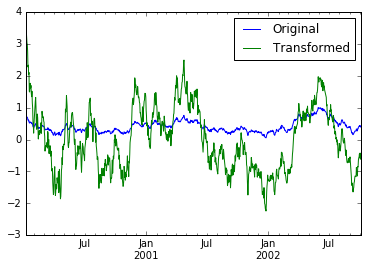

In [90]:
compare.plot()

In [91]:
cols=['A','B','C']

In [92]:
values=np.random.randn(1000,3)

In [93]:
values[np.random.randint(0,1000,100),0] = np.nan

In [94]:
values[np.random.randint(0,1000,50),1] = np.nan

In [95]:
values[np.random.randint(0,1000,2)] = np.nan

In [96]:
data_df=pd.DataFrame(values,columns=cols)

In [97]:
data_df

A         B         C
0   -1.175897 -0.473534  0.775888
1         NaN       NaN  0.068655
2    0.434304  0.126008  0.979073
3   -0.152876 -0.609126 -0.863702
4   -0.267301  0.191940  0.364698
5    0.914331  1.203649 -0.230714
6   -0.825824  0.604548  0.297876
7    1.378993 -1.945080  1.563119
8    1.412797 -0.108032 -0.357380
9   -0.132751  0.378739  0.199701
10  -2.184617  0.683277  2.640189
11   0.534732 -2.099984 -2.064713
12   0.783741 -1.010177 -1.108198
13   0.386160 -0.817256  0.318508
14  -0.613967 -0.225735 -1.532644
15  -1.561123  0.071667 -0.194404
16  -0.367031 -2.031557 -0.794743
17  -1.060735 -2.413092 -0.112568
18  -0.481859  1.411136  0.996933
19        NaN -0.149341 -1.299577
20   0.167153  1.487794 -0.736654
21   1.603054  0.099056  0.556393
22  -0.788593 -0.345568 -0.483749
23  -0.020671  0.029943  0.678625
24  -0.300837  1.562677 -1.210592
25  -1.115890 -0.977608  0.604008
26        NaN -0.569561 -1.030212
27  -1.487024 -1.440434 -1.027191
28  -1.326243 -0.563673  0.493375
29  -0.628156 -1.320251 -0.981389
..        ...       ...       ...
970  0.433974 -0.201378  0.888586
971 -1.494023  0.091645  1.142637
972 -0.624642  0.587566  0.461478
973 -0.214137 -1.742479  1.247394
974       NaN -1.011132  0.200233
975 -0.499953 -0.507686 -2.536410
976 -0.185578  0.174633 -1.099270
977 -1.988105 -0.005701 -0.587559
978 -2.340460 -2.241294  1.508656
979  0.197682 -0.450771 -0.796844
980  0.253696  0.355303  1.227936
981       NaN  0.100644  0.511323
982  0.370583  0.319433 -0.351843
983 -1.270487 -0.550253 -0.493203
984       NaN  0.018212 -0.794935
985  0.696913 -1.745216  0.368257
986 -1.201639 -1.412295  1.105960
987  0.213554  1.375786  0.005918
988  0.735655 -0.159927  0.922623
989       NaN  0.975900  0.162165
990 -1.152286       NaN -1.153342
991  0.307536  0.350248  0.763999
992  2.539855 -1.587928 -0.299731
993  0.637764  0.111579 -0.447840
994 -1.015693  1.266055 -0.158726
995 -0.468595  0.950427 -1.538861
996  0.037827  0.081775 -0.271379
997  0.507835 -1.449233  0.769192
998  0.242404 -0.406151  1.102603
999  1.889948  0.966365 -0.218217

[1000 rows x 3 columns]

In [129]:
countries=np.array(['US','Uk','GR','JP'])

In [130]:
key=countries[np.random.randint(0,4,1000)]

In [131]:
grouped=data_df.groupby(key)

In [132]:
grouped.count()

A    B    C
GR  228  246  258
JP  218  238  248
US  213  216  231
Uk  244  249  261

In [139]:
f=lambda x: x.fillna(x.mean)

In [142]:
transformed = grouped.transform(f)

In [143]:
grouped_trans = transformed.groupby(key)

In [144]:
grouped.mean()

A         B         C
GR  0.034371 -0.013137  0.040819
JP -0.123848  0.042602  0.009954
US -0.062993  0.022134 -0.072664
Uk -0.005132  0.063253  0.044198

In [146]:
grouped.count()

A    B    C
GR  228  246  258
JP  218  238  248
US  213  216  231
Uk  244  249  261

In [147]:
grouped_trans.count()

A    B    C
GR  258  258  258
JP  250  250  250
US  231  231  231
Uk  261  261  261

In [148]:
grouped_trans.size()

GR    258
JP    250
US    231
Uk    261
dtype: int64

In [150]:
grouped.ffill()

A         B         C
0   -1.175897 -0.473534  0.775888
1   -1.175897 -0.473534  0.068655
2    0.434304  0.126008  0.979073
3   -0.152876 -0.609126 -0.863702
4   -0.267301  0.191940  0.364698
5    0.914331  1.203649 -0.230714
6   -0.825824  0.604548  0.297876
7    1.378993 -1.945080  1.563119
8    1.412797 -0.108032 -0.357380
9   -0.132751  0.378739  0.199701
10  -2.184617  0.683277  2.640189
11   0.534732 -2.099984 -2.064713
12   0.783741 -1.010177 -1.108198
13   0.386160 -0.817256  0.318508
14  -0.613967 -0.225735 -1.532644
15  -1.561123  0.071667 -0.194404
16  -0.367031 -2.031557 -0.794743
17  -1.060735 -2.413092 -0.112568
18  -0.481859  1.411136  0.996933
19  -1.561123 -0.149341 -1.299577
20   0.167153  1.487794 -0.736654
21   1.603054  0.099056  0.556393
22  -0.788593 -0.345568 -0.483749
23  -0.020671  0.029943  0.678625
24  -0.300837  1.562677 -1.210592
25  -1.115890 -0.977608  0.604008
26  -1.115890 -0.569561 -1.030212
27  -1.487024 -1.440434 -1.027191
28  -1.326243 -0.563673  0.493375
29  -0.628156 -1.320251 -0.981389
..        ...       ...       ...
970  0.433974 -0.201378  0.888586
971 -1.494023  0.091645  1.142637
972 -0.624642  0.587566  0.461478
973 -0.214137 -1.742479  1.247394
974 -0.214137 -1.011132  0.200233
975 -0.499953 -0.507686 -2.536410
976 -0.185578  0.174633 -1.099270
977 -1.988105 -0.005701 -0.587559
978 -2.340460 -2.241294  1.508656
979  0.197682 -0.450771 -0.796844
980  0.253696  0.355303  1.227936
981 -2.340460  0.100644  0.511323
982  0.370583  0.319433 -0.351843
983 -1.270487 -0.550253 -0.493203
984 -1.270487  0.018212 -0.794935
985  0.696913 -1.745216  0.368257
986 -1.201639 -1.412295  1.105960
987  0.213554  1.375786  0.005918
988  0.735655 -0.159927  0.922623
989  0.370583  0.975900  0.162165
990 -1.152286  0.018212 -1.153342
991  0.307536  0.350248  0.763999
992  2.539855 -1.587928 -0.299731
993  0.637764  0.111579 -0.447840
994 -1.015693  1.266055 -0.158726
995 -0.468595  0.950427 -1.538861
996  0.037827  0.081775 -0.271379
997  0.507835 -1.449233  0.769192
998  0.242404 -0.406151  1.102603
999  1.889948  0.966365 -0.218217

[1000 rows x 3 columns]

In [151]:
sf=pd.Series([1,1,2,3,3,3])

In [152]:
sf.groupby(sf).filter(lambda x: x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [153]:
dff=pd.DataFrame({'A': np.arange(8),'B':list('aabbbbcc')})

In [154]:
dff.groupby('B').filter(lambda x: len(x)>2)

A  B
2  2  b
3  3  b
4  4  b
5  5  b

In [155]:
dff.groupby('B').filter(lambda x:len(x)>2,dropna=False)

A    B
0 NaN  NaN
1 NaN  NaN
2   2    b
3   3    b
4   4    b
5   5    b
6 NaN  NaN
7 NaN  NaN

In [156]:
dff['C']=np.arange(8)

In [157]:
dff.groupby('B').filter(lambda x: len(x['C'])>2)

A  B  C
2  2  b  2
3  3  b  3
4  4  b  4
5  5  b  5

In [158]:
dff.groupby('B').head(2)

A  B  C
0  0  a  0
1  1  a  1
2  2  b  2
3  3  b  3
6  6  c  6
7  7  c  7

In [159]:
grouped=df.groupby('A')

In [160]:
grouped.agg(lambda x: x.std())

C         D
A                      
bar  0.657871  0.720594
foo  0.115858  1.037398

In [161]:
grouped.std()

C         D
A                      
bar  0.657871  0.720594
foo  0.115858  1.037398

In [163]:
tsdf = pd.DataFrame(np.random.randn(1000, 3),
                       index=pd.date_range('1/1/2000', periods=1000),
                      columns=['A', 'B', 'C'])

In [164]:
tsdf.ix[::2] = np.nan

In [165]:
grouped = tsdf.groupby(lambda x: x.year)

In [166]:
grouped.fillna(method='pad')

A         B         C
2000-01-01       NaN       NaN       NaN
2000-01-02 -1.256304  0.639813 -0.436901
2000-01-03 -1.256304  0.639813 -0.436901
2000-01-04 -1.496730 -0.101351 -1.138480
2000-01-05 -1.496730 -0.101351 -1.138480
2000-01-06  1.266571 -0.374182  0.369044
2000-01-07  1.266571 -0.374182  0.369044
2000-01-08  0.773422 -0.401924  1.129057
2000-01-09  0.773422 -0.401924  1.129057
2000-01-10  0.503902  0.174613  0.601879
2000-01-11  0.503902  0.174613  0.601879
2000-01-12 -0.646649  0.427910  0.339711
2000-01-13 -0.646649  0.427910  0.339711
2000-01-14  0.963094  0.672716 -1.131275
2000-01-15  0.963094  0.672716 -1.131275
2000-01-16 -0.041299  0.789806  1.572994
2000-01-17 -0.041299  0.789806  1.572994
2000-01-18 -0.632367  0.848856 -0.217752
2000-01-19 -0.632367  0.848856 -0.217752
2000-01-20  0.470966 -0.343420  0.419868
2000-01-21  0.470966 -0.343420  0.419868
2000-01-22  0.543831 -0.258569 -0.049004
2000-01-23  0.543831 -0.258569 -0.049004
2000-01-24 -0.664073  0.698124  1.084780
2000-01-25 -0.664073  0.698124  1.084780
2000-01-26  2.731856  0.243775 -0.577619
2000-01-27  2.731856  0.243775 -0.577619
2000-01-28  1.129734  0.715597  0.074009
2000-01-29  1.129734  0.715597  0.074009
2000-01-30 -0.423762  0.304997  0.741166
...              ...       ...       ...
2002-08-28 -0.177570 -1.063510 -0.496219
2002-08-29 -1.605471  0.905704  0.219598
2002-08-30 -1.605471  0.905704  0.219598
2002-08-31 -2.409573  0.967184 -0.141563
2002-09-01 -2.409573  0.967184 -0.141563
2002-09-02 -0.212993 -0.033338 -0.111880
2002-09-03 -0.212993 -0.033338 -0.111880
2002-09-04 -0.203217  0.205063 -0.529648
2002-09-05 -0.203217  0.205063 -0.529648
2002-09-06 -1.340779 -0.221884  1.450112
2002-09-07 -1.340779 -0.221884  1.450112
2002-09-08 -1.133197  0.152411 -1.007360
2002-09-09 -1.133197  0.152411 -1.007360
2002-09-10  1.270492 -0.139446 -1.276130
2002-09-11  1.270492 -0.139446 -1.276130
2002-09-12 -1.479923  1.496107  0.227004
2002-09-13 -1.479923  1.496107  0.227004
2002-09-14 -2.619532  0.104182  0.106404
2002-09-15 -2.619532  0.104182  0.106404
2002-09-16  0.817361  0.478742  1.249962
2002-09-17  0.817361  0.478742  1.249962
2002-09-18 -0.094586 -1.819890  1.597984
2002-09-19 -0.094586 -1.819890  1.597984
2002-09-20  1.331597  0.284538  0.656744
2002-09-21  1.331597  0.284538  0.656744
2002-09-22 -0.146914 -0.796980  0.656709
2002-09-23 -0.146914 -0.796980  0.656709
2002-09-24 -0.545421  0.849889 -0.288135
2002-09-25 -0.545421  0.849889 -0.288135
2002-09-26  0.306780 -0.240178  1.413235

[1000 rows x 3 columns]

In [167]:
s=pd.Series([9,8,7,19,1,4.2,3.3])

In [168]:
g=pd.Series(list('abababab'))

In [169]:
gb=s.groupby(g)

In [170]:
gb.nlargest(3)

a  0     9.0
   2     7.0
   6     3.3
b  3    19.0
   1     8.0
   5     4.2
dtype: float64

In [171]:
gb.nsmallest(3)

a  4     1.0
   6     3.3
   2     7.0
b  5     4.2
   1     8.0
   3    19.0
dtype: float64

In [172]:
df

A      B         C         D
0  foo    one  0.556497  1.973154
1  bar    one -0.065341  1.085789
2  foo    two  0.762798 -0.320861
3  bar  three -1.027328 -0.351481
4  foo    two  0.609922  0.559290
5  bar    two  0.231045  0.275189
6  foo    one  0.687213 -0.726632
7  foo  three  0.845492  0.525181

In [173]:
grouped=df.groupby('A')

In [174]:
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.287208
     std      0.657871
     min     -1.027328
     25%     -0.546334
     50%     -0.065341
     75%      0.082852
     max      0.231045
foo  count    5.000000
     mean     0.692384
     std      0.115858
     min      0.556497
     25%      0.609922
     50%      0.687213
     75%      0.762798
     max      0.845492
dtype: float64

In [175]:
grouped=df.groupby('A')['C']

In [176]:
def f(group):
    return pd.DataFrame({'original':group,
                         'demeaned':group-group.mean()})

In [177]:
grouped.apply(f)

demeaned  original
0 -0.135887  0.556497
1  0.221867 -0.065341
2  0.070413  0.762798
3 -0.740120 -1.027328
4 -0.082462  0.609922
5  0.518252  0.231045
6 -0.005172  0.687213
7  0.153107  0.845492

In [179]:
def f(x):
    return pd.Series([x,x**2], index=['x','x^s'])

In [180]:
s

0     9.0
1     8.0
2     7.0
3    19.0
4     1.0
5     4.2
6     3.3
dtype: float64

In [181]:
s.apply(f)

x     x^s
0   9.0   81.00
1   8.0   64.00
2   7.0   49.00
3  19.0  361.00
4   1.0    1.00
5   4.2   17.64
6   3.3   10.89

In [182]:
df

A      B         C         D
0  foo    one  0.556497  1.973154
1  bar    one -0.065341  1.085789
2  foo    two  0.762798 -0.320861
3  bar  three -1.027328 -0.351481
4  foo    two  0.609922  0.559290
5  bar    two  0.231045  0.275189
6  foo    one  0.687213 -0.726632
7  foo  three  0.845492  0.525181

In [183]:
df.groupby('A').std()

C         D
A                      
bar  0.657871  0.720594
foo  0.115858  1.037398

In [184]:
data=pd.Series(np.random.randn(100))

In [185]:
factor=pd.qcut(data,[0,.25,.5,.75,1.])

In [187]:
data.groupby(factor).mean()

[-2.878, -0.805]   -1.447730
(-0.805, 0.0108]   -0.395276
(0.0108, 0.631]     0.328928
(0.631, 3.383]      1.389842
dtype: float64

In [189]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])

In [190]:
df

A  B
0  1  2
1  1  4
2  5  6

In [191]:
g=df.groupby('A')

In [192]:
g.head(1)

A  B
0  1  2
2  5  6

In [193]:
g.tail(1)

A  B
1  1  4
2  5  6

In [194]:
df=pd.DataFrame([[1,np.nan],[1,4],[5,6]],columns=['A','B'])

In [195]:
g = df.groupby('A')

In [196]:
g.nth(0)

B
A    
1 NaN
5   6

In [197]:
g.nth(-1)

B
A   
1  4
5  6

In [198]:
g.nth(1)

B
A   
1  4

In [199]:
g.nth(0,dropna='any')

B
A   
1  4
5  6

In [200]:
g.first()

B
A   
1  4
5  6

In [201]:
g.nth(-1,dropna='any')

B
A   
1  4
5  6

In [202]:
g.last()

B
A   
1  4
5  6

In [203]:
g.B.nth(0,dropna=True)

A
1    4
5    6
Name: B, dtype: float64

In [204]:
df=pd.DataFrame([[1,np.nan],[1,4],[5,6]],columns=['A','B'])

In [205]:
g=df.groupby('A',as_index=False)

In [206]:
g.nth(0)

A   B
0  1 NaN
2  5   6

In [208]:
g.nth(-1)

A  B
1  1  4
2  5  6

In [211]:
business_dates=pd.date_range(start='4/1/2014',end='6/30/2014',freq='B')

In [212]:
df=pd.DataFrame(1,index=business_dates,columns=['a','b'])

In [213]:
df.groupby((df.index.year,df.index.month)).nth([0,3,-1])

a  b
2014-04-01  1  1
2014-04-04  1  1
2014-04-30  1  1
2014-05-01  1  1
2014-05-06  1  1
2014-05-30  1  1
2014-06-02  1  1
2014-06-05  1  1
2014-06-30  1  1

In [214]:
df=pd.DataFrame(list('aaabba'),columns=['A'])

In [215]:
df

A
0  a
1  a
2  a
3  b
4  b
5  a

In [216]:
df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [217]:
df.groupby('A').cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

In [218]:
df=pd.DataFrame({
        'a':[0,0,0,0,1,1,1,1,2,2,2,2],
        'b':[0,0,1,1,0,0,1,1,0,0,1,1],
        'c':[1,0,1,0,1,0,1,0,1,0,1,0],
        'd':[0,0,0,1,0,0,0,1,0,0,0,1],
    })

In [219]:
def compute_metrics(x):
    result={'b_sum':x['b'].sum(),'c_mean':x['c'].mean()}
    return pd.Series(result,name='matrics')

In [220]:
result=df.groupby('a').apply(compute_metrics)

In [221]:
result

matrics  b_sum  c_mean
a                     
0            2     0.5
1            2     0.5
2            2     0.5

In [222]:
result.stack()

a  matrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64